# Step-1 : Importing libraries

In [87]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import iqr

In [88]:
#reading data
df = pd.read_csv('StudentsPerformance.csv')

In [89]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Step-2: Data exploration

In [90]:
#Displaying statistical details of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [91]:
#Counting the number of entries of each class
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [92]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [93]:
#Using label encoding scheme to encode the target
le = LabelEncoder()
df['test preparation course'] = le.fit_transform(df['test preparation course'])

In [94]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,1,72,72,74
1,female,group C,some college,standard,0,69,90,88
2,female,group B,master's degree,standard,1,90,95,93
3,male,group A,associate's degree,free/reduced,1,47,57,44
4,male,group C,some college,standard,1,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,0,88,99,95
996,male,group C,high school,free/reduced,1,62,55,55
997,female,group C,high school,free/reduced,0,59,71,65
998,female,group D,some college,standard,0,68,78,77


<AxesSubplot:>

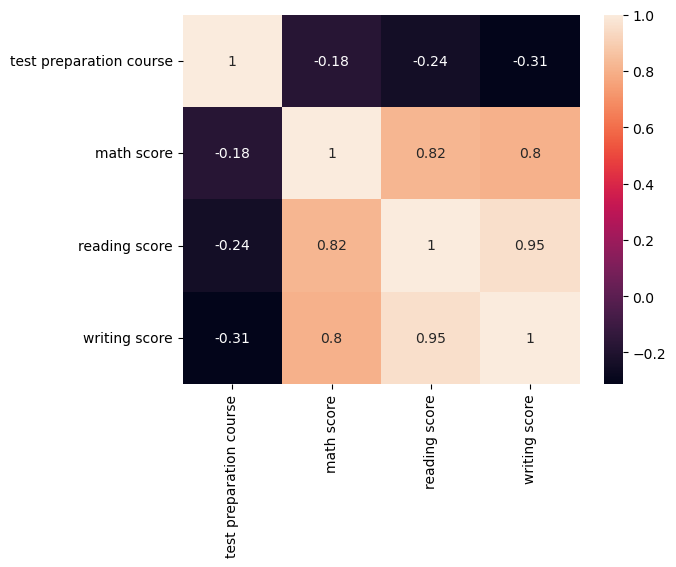

In [95]:
#using heatmap to display the correlation values between dataset columns
sns.heatmap(data=df.corr(), annot=True)

In [96]:
#checking for null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<AxesSubplot:>

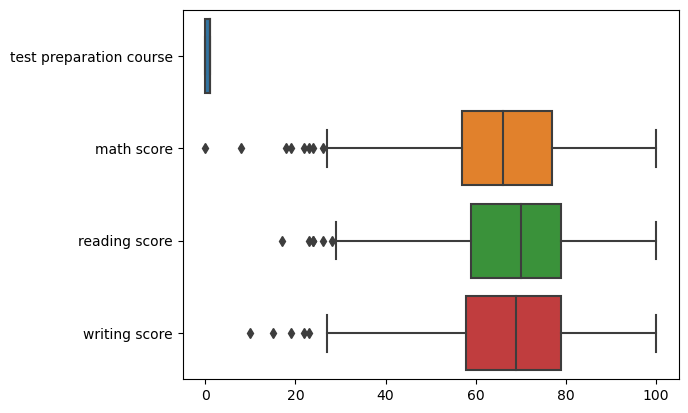

In [97]:
#checking for outliers
sns.boxplot(data = df, orient='h')

## Handling outliers using quartile method

# Step-3: Splitting data into features and target

In [98]:
feature = df[['writing score']]
feature.shape

(1000, 1)

In [99]:
feature

,writing score
0,74
1,88
2,93
3,44
4,75
...,...
995,95
996,55
997,65
998,77


In [100]:
target = df['test preparation course']
target.shape

(1000,)

# Step-4: splitting data into training and testing sets

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size=0.2)

# Step-5: Fitting the training and testing sets in logistic regression model

In [102]:
scaling = StandardScaler()

In [103]:
X_train = scaling.fit_transform(X_train)

In [104]:
X_test = scaling.fit_transform(X_test)

In [105]:
logReg = LogisticRegression()

In [106]:
logReg.fit(X_train, Y_train)

LogisticRegression()

In [107]:
logReg.score(X_test, Y_test)

0.665

In [108]:
Y_pred = logReg.predict(X_test)

In [109]:
Y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1])